In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
base_model = tf.keras.applications.ResNet101V2(include_top=False)
base_model.summary()

Metal device set to: Apple M1
Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                       

                                                                                                  
 conv2_block2_out (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_conv[0][0]']    
                                                                                                  
 conv2_block3_preact_bn (BatchN  (None, None, None,   1024       ['conv2_block2_out[0][0]']       
 ormalization)                  256)                                                              
                                                                                                  
 conv2_block3_preact_relu (Acti  (None, None, None,   0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                        256)                                                              
                                                                                                  
 conv2_blo

                                128)                             ]                                
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, None, None,   0          ['conv3_block2_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_2_pad (ZeroPaddin  (None, None, None,   0          ['conv3_block2_1_relu[0][0]']    
 g2D)                           128)                                                              
          

 conv3_block4_2_relu (Activatio  (None, None, None,   0          ['conv3_block4_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, None, None,   0          ['conv3_block3_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv3_block4_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block4_2_relu[0][0]']    
                                512)                                                              
                                                                                                  
 conv3_block4_out (Add)         (None, None, None,   0           ['max_pooling2d_1[0][0]',        
          

                                                                                                  
 conv4_block3_preact_relu (Acti  (None, None, None,   0          ['conv4_block3_preact_bn[0][0]'] 
 vation)                        1024)                                                             
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, None, None,   262144      ['conv4_block3_preact_relu[0][0]'
                                256)                             ]                                
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block3_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_blo

                                256)                                                              
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block5_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, None, None,   0          ['conv4_block5_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block5_2_relu[0][0]']    
                                1024)                                                             
          

 conv4_block8_preact_relu (Acti  (None, None, None,   0          ['conv4_block8_preact_bn[0][0]'] 
 vation)                        1024)                                                             
                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, None, None,   262144      ['conv4_block8_preact_relu[0][0]'
                                256)                             ]                                
                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block8_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, None, None,   0          ['conv4_block8_1_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block10_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block10_2_relu (Activati  (None, None, None,   0          ['conv4_block10_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block10_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block10_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_blo

 ivation)                       1024)                                                             
                                                                                                  
 conv4_block13_1_conv (Conv2D)  (None, None, None,   262144      ['conv4_block13_preact_relu[0][0]
                                256)                             ']                               
                                                                                                  
 conv4_block13_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block13_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block13_1_relu (Activati  (None, None, None,   0          ['conv4_block13_1_bn[0][0]']     
 on)                            256)                                                              
          

 conv4_block15_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block15_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block15_2_relu (Activati  (None, None, None,   0          ['conv4_block15_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block15_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block15_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block15_out (Add)        (None, None, None,   0           ['conv4_block14_out[0][0]',      
          

                                                                                                  
 conv4_block18_1_conv (Conv2D)  (None, None, None,   262144      ['conv4_block18_preact_relu[0][0]
                                256)                             ']                               
                                                                                                  
 conv4_block18_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block18_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block18_1_relu (Activati  (None, None, None,   0          ['conv4_block18_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

 lization)                      256)                                                              
                                                                                                  
 conv4_block20_2_relu (Activati  (None, None, None,   0          ['conv4_block20_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block20_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block20_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block20_out (Add)        (None, None, None,   0           ['conv4_block19_out[0][0]',      
                                1024)                             'conv4_block20_3_conv[0][0]']   
          

 conv4_block23_1_conv (Conv2D)  (None, None, None,   262144      ['conv4_block23_preact_relu[0][0]
                                256)                             ']                               
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block23_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block23_1_relu (Activati  (None, None, None,   0          ['conv4_block23_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block23_2_pad (ZeroPaddi  (None, None, None,   0          ['conv4_block23_1_relu[0][0]']   
 ng2D)    

                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, None, None,   2359296     ['conv5_block2_2_pad[0][0]']     
                                512)                                                              
                                                                                                  
 conv5_block2_2_bn (BatchNormal  (None, None, None,   2048       ['conv5_block2_2_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, None, None,   0          ['conv5_block2_2_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_blo

In [3]:
input_layer = keras.Input(shape=(64, 64, 3))
print(f'input_layer: {input_layer.shape}')
x = base_model(input_layer)
print(f'x: {x.shape}')
x = layers.GlobalAveragePooling2D()(x)
print(f'x: {x.shape}')
x = layers.Dense(units=2, activation='softmax')(x)
print(f'x: {x.shape}')
model = keras.Model(inputs=[input_layer], outputs=[x])
model.summary()

input_layer: (None, 64, 64, 3)
x: (None, 2, 2, 2048)
x: (None, 2048)
x: (None, 2)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 resnet101v2 (Functional)    (None, None, None, 2048)  42626560  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 42,630,658
Trainable params: 42,532,994
Non-trainable params: 97,664
_________________________________________________________________


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.3,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1/255.
)

In [5]:
train_dataset = train_datagen.flow_from_directory(
    directory='../../training_image_augmented_output/',
    target_size=(64, 64),
    class_mode='categorical',
    batch_size=32,
    subset='training',
    shuffle=True
)

val_dataset = train_datagen.flow_from_directory(
    directory='../../training_image_augmented_output/',
    target_size=(64, 64),
    class_mode='categorical',
    batch_size=32,
    subset='validation',
    shuffle=True
)

test_dataset = test_datagen.flow_from_directory(
    directory='../../data/test/',
    target_size=(64, 64),
    class_mode='categorical',
    shuffle=True
)

Found 9001 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'benign': 0, 'malignant': 1}

In [7]:
checkpoint_path = '../../../checkpoints/resnet'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                          monitor='metric.false_negatives',
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adagrad(), loss='categorical_crossentropy', 
             metrics=[
                 tf.keras.metrics.AUC(),
                 tf.keras.metrics.FalseNegatives(),
                 tf.keras.metrics.FalsePositives(),
                 tf.keras.metrics.Precision(),
                 tf.keras.metrics.Recall(),
                 'accuracy'
             ])
history = model.fit(train_dataset, 
                    epochs=25, 
                    validation_data=val_dataset, 
                    steps_per_epoch=len(train_dataset),
                    validation_steps=len(val_dataset), 
                    callbacks=[checkpoint_callback])

Epoch 1/25
282/282 [==============================] - ETA: 0s - loss: 0.4772 - auc: 0.8563 - false_negatives: 2080.0000 - false_positives: 2080.0000 - precision: 0.7689 - recall: 0.7689 - accuracy: 0.7689
Epoch 1: val_loss improved from inf to 0.46264, saving model to ../../../checkpoints/resnet
INFO:tensorflow:Assets written to: ../../../checkpoints/resnet/assets
282/282 [==============================] - 83s 280ms/step - loss: 0.4772 - auc: 0.8563 - false_negatives: 2080.0000 - false_positives: 2080.0000 - precision: 0.7689 - recall: 0.7689 - accuracy: 0.7689 - val_loss: 0.4626 - val_auc: 0.8659 - val_false_negatives: 241.0000 - val_false_positives: 241.0000 - val_precision: 0.7588 - val_recall: 0.7588 - val_accuracy: 0.7588
Epoch 2/25
282/282 [==============================] - ETA: 0s - loss: 0.3284 - auc: 0.9337 - false_negatives: 1339.0000 - false_positives: 1339.0000 - precision: 0.8512 - recall: 0.8512 - accuracy: 0.8512
Epoch 2: val_loss did not improve from 0.46264
282/282 [==

Epoch 14/25
282/282 [==============================] - ETA: 0s - loss: 0.0861 - auc: 0.9958 - false_negatives: 294.0000 - false_positives: 294.0000 - precision: 0.9673 - recall: 0.9673 - accuracy: 0.9673
Epoch 14: val_loss did not improve from 0.42707
282/282 [==============================] - 67s 236ms/step - loss: 0.0861 - auc: 0.9958 - false_negatives: 294.0000 - false_positives: 294.0000 - precision: 0.9673 - recall: 0.9673 - accuracy: 0.9673 - val_loss: 0.5622 - val_auc: 0.8907 - val_false_negatives: 195.0000 - val_false_positives: 195.0000 - val_precision: 0.8048 - val_recall: 0.8048 - val_accuracy: 0.8048
Epoch 15/25
282/282 [==============================] - ETA: 0s - loss: 0.0732 - auc: 0.9970 - false_negatives: 231.0000 - false_positives: 231.0000 - precision: 0.9743 - recall: 0.9743 - accuracy: 0.9743
Epoch 15: val_loss did not improve from 0.42707
282/282 [==============================] - 65s 232ms/step - loss: 0.0732 - auc: 0.9970 - false_negatives: 231.0000 - false_posit

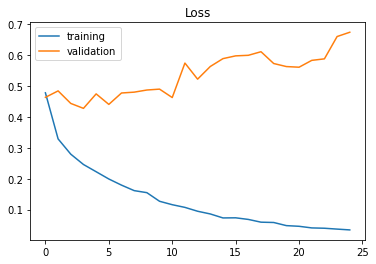

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend();

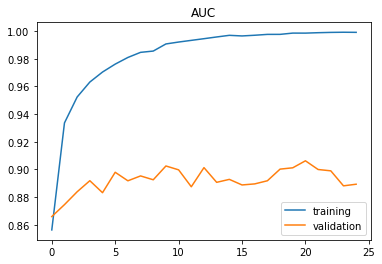

In [10]:
plt.figure()
plt.plot(history.history['auc'], label='training')
plt.plot(history.history['val_auc'], label='validation')
plt.title('AUC')
plt.legend();

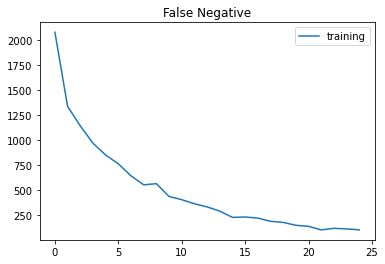

In [11]:
plt.figure()
plt.plot(history.history['false_negatives'], label='training')
plt.title('False Negative')
plt.legend();

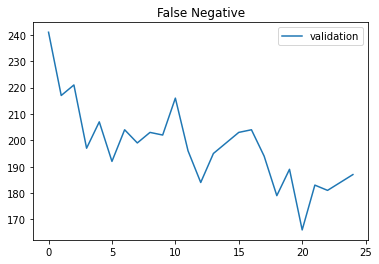

In [12]:
plt.figure()
plt.plot(history.history['val_false_negatives'], label='validation')
plt.title('False Negative')
plt.legend();

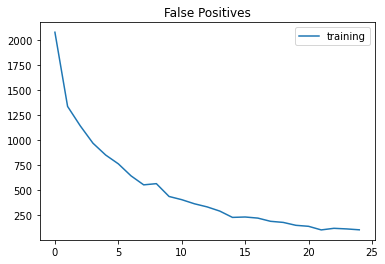

In [13]:
plt.figure()
plt.plot(history.history['false_positives'], label='training')
plt.title('False Positives')
plt.legend();

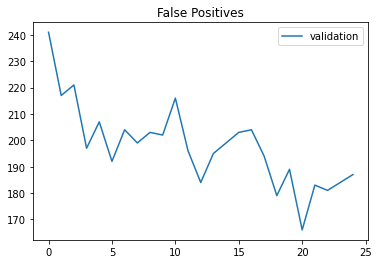

In [14]:
plt.figure()
plt.plot(history.history['val_false_positives'], label='validation')
plt.title('False Positives')
plt.legend();

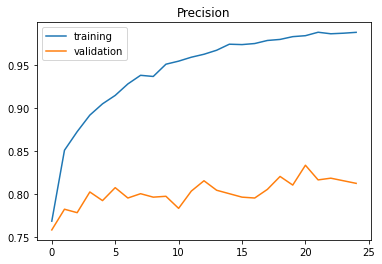

In [15]:
plt.figure()
plt.plot(history.history['precision'], label='training')
plt.plot(history.history['val_precision'], label='validation')
plt.title('Precision')
plt.legend();

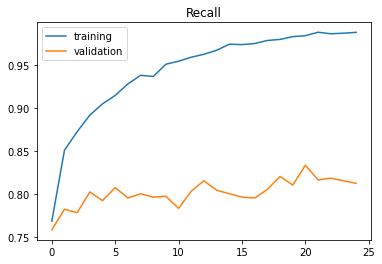

In [16]:
plt.figure()
plt.plot(history.history['recall'], label='training')
plt.plot(history.history['val_recall'], label='validation')
plt.title('Recall')
plt.legend();

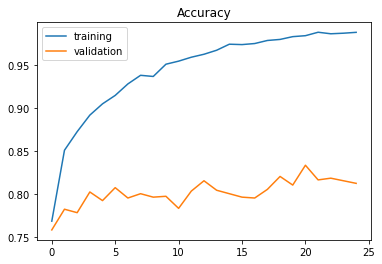

In [17]:
plt.figure()
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend();

In [18]:
model.evaluate(train_dataset)

282/282 [==============================] - 19s 67ms/step - loss: 0.0069 - auc: 1.0000 - false_negatives: 4.0000 - false_positives: 4.0000 - precision: 0.9996 - recall: 0.9996 - accuracy: 0.9996


[0.006930578034371138,
 0.9999805688858032,
 4.0,
 4.0,
 0.9995555877685547,
 0.9995555877685547,
 0.9995555877685547]

In [19]:
model.evaluate(val_dataset)

32/32 [==============================] - 2s 65ms/step - loss: 0.6567 - auc: 0.8930 - false_negatives: 179.0000 - false_positives: 179.0000 - precision: 0.8208 - recall: 0.8208 - accuracy: 0.8208


[0.656663715839386,
 0.8930051922798157,
 179.0,
 179.0,
 0.8208208084106445,
 0.8208208084106445,
 0.8208208084106445]

In [20]:
model.evaluate(test_dataset)

21/21 [==============================] - 2s 94ms/step - loss: 0.4734 - auc: 0.9354 - false_negatives: 80.0000 - false_positives: 80.0000 - precision: 0.8788 - recall: 0.8788 - accuracy: 0.8788


[0.4733511507511139,
 0.9354085922241211,
 80.0,
 80.0,
 0.8787879347801208,
 0.8787879347801208,
 0.8787879347801208]

In [21]:
model.save('../../../melanoma-detection/model.h5')